# CS1470/2470 HW1: KNN (with MNIST)

In this homework assignment, you will experience the overall machine learning process from start to end by implementing your own version of the **k-Nearest Neighbors** algorithm.

In [40]:
!python -VV

Python 3.8.13 (default, Mar 28 2022, 06:16:26) 
[Clang 12.0.0 ]


If you are running the notebook on Colab, you need to mount your drive or repo. An example of these is provided [here](https://colab.research.google.com/drive/1ioIGn7zOp46lgMEcL4P54Y9Y_z7PnI7K?usp=sharing).

In [41]:
import os
import sys

## Path to data
data_path = "../data"

## Make sure the data is downloaded appropriately
![ ! -d "$data_path" ] && cd .. && bash download.sh && cd code

In [42]:
%load_ext autoreload
%autoreload 1
%aimport KNN_Model, preprocess

import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preprocessing

### Data Preparation

In a machine learning project, you need a separate train set and a test set. Sometimes, you also need a validation set to fit hyperparameters, but for this homework assignment, we are not going to use a validation set. 

<span style="color:blue;font-weight:bold">Code Block #1: Preprocessing</span>

1. Load the full train and test datasets by using the function `get_data_MNIST` in `preprocess.py`.
   - DO NOT shuffle the dataset. It's usually a good practice to do so, but don't do it here for the sake of simplicity. You will shuffle the dataset at the CIFAR part of the hoemwork assignment.
2. Keep only a small subset of the full datasets by using the function `get_subset` in `preprocess.py`.
   - For the train set, keep only 1000 images and labels for each digit, so that your train image array should have the shape (10000, 784), and your train label array should have the shape (10000,)
   - For the test set, 250 images and labels for each digit, so the shapes are (2500, 784), and (2500,).

In [75]:
from preprocess import *

digit_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## TODO: Implement preprocessing step as described above, 
## implementing preprocess.py in the process
image_train_full, label_train_full = get_data_MNIST("train", data_path)
image_test_full,  label_test_full  = get_data_MNIST("test", data_path)

image_train, label_train = get_subset(image_train_full, label_train_full, digit_list, 1000)
image_test,  label_test  = get_subset(image_test_full, label_test_full, digit_list, 250)

### Data Visualization

Matplotlib's pyplot module is a good starting point to create a quick and dirty way of visually inspecting your data.

Text(0.5, 1.0, 'MNIST Digit Example')

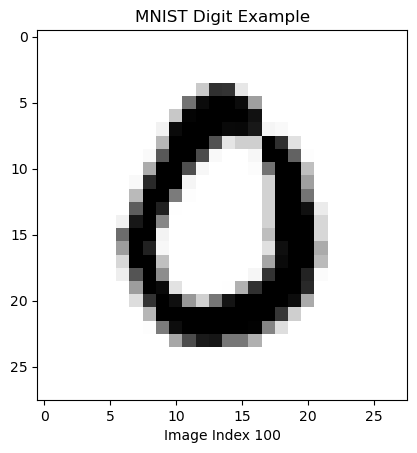

In [76]:
plt.imshow(image_test[20].reshape(28, 28), cmap = "Greys")
plt.xlabel("Image Index 100")
plt.title("MNIST Digit Example")

However, if you want to do something more complicated, Pyplot's feature is quite limited. You probably want to use the lower-level Figure and Axis API directly.

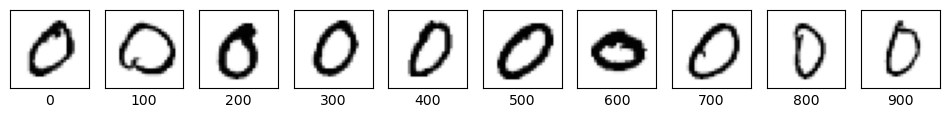

In [77]:
indices_to_inspect = list(range(0, 1000, 100))

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(12, 1.2)

for i, each_image in enumerate(indices_to_inspect):
    ax[i].imshow(image_train[each_image].reshape(28, 28), cmap = "Greys")
    ax[i].tick_params(left=False)
    ax[i].tick_params(bottom=False)
    ax[i].tick_params(labelleft=False)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xlabel(f"{each_image}")

## KNN

### Model Building

Now it's time to make your own implementation of the k-Nearest Neighbors algorithm.

<span style="color:blue;font-weight:bold">Code Block #2: Building the model</span>

Create a KNN model, or an instance of the class KNN_Model and fit it with the train dataset. 
- Although, `k_neighbors` can be any integer in theory, keep `k_neighbors == 9` in this homework assignment. 
- The name of the KNN_Model instance must be `model_mnist`, so that you can run the following Code Blocks without trouble.

In [78]:
from KNN_Model import KNN_Model

## TODO: Implement training step as described above, 
## implementing model.py in the process
model_mnist = KNN_Model(digit_list, 9)
model_mnist.fit(image_train, label_train)

We can try the model with a sample image that the model has never seen before.

### Model Visualization

<span style="color:blue;font-weight:bold">Code Block #3: Interacting with the model</span>

Text(0.5, 1.0, 'MY MNIST Digit Example')

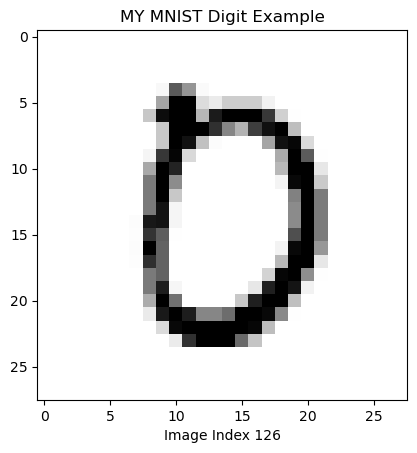

In [79]:
## Pull in a specific image
sample_image = image_test[126].copy()
## TODO: Show what the image looks like using plt.imshow
plt.imshow(sample_image.reshape(28, 28), cmap = "Greys")
plt.xlabel("Image Index 126")
plt.title("MY MNIST Digit Example")

In [80]:
## TODO: Figure out the closest k neighbors based on the model.
class_counts, nearest_indices = model_mnist.get_neighbor_counts(sample_image, True)
print(class_counts)

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0]


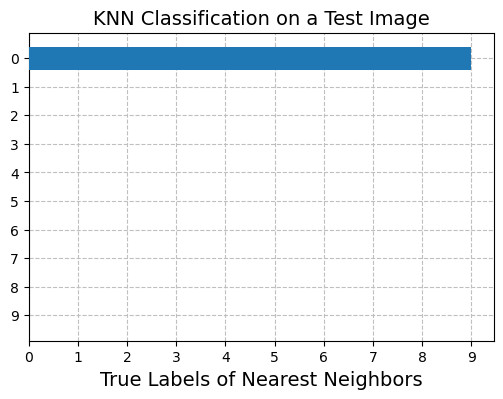

In [81]:
fig_knn, ax_knn = plt.subplots()

digit_counts = model_mnist.get_neighbor_counts(sample_image)
ax_knn.barh(y=digit_list, width=digit_counts, zorder=100)
ax_knn.invert_yaxis()
ax_knn.set_yticks(digit_list)
ax_knn.set_xticks(np.arange(1 + np.max(digit_counts)))
ax_knn.set_title("KNN Classification on a Test Image", fontsize=14)
ax_knn.set_xlabel("True Labels of Nearest Neighbors", fontsize=14)
ax_knn.grid(linestyle="dashed", color="#bfbfbf", zorder=-100)
fig_knn.set_size_inches([6, 4])

# You can also save the figure in the pdf, png, and svg formats
# fig.savefig(f"KNN_Test_Image_MNIST.png", dpi=300, bbox_inches="tight")

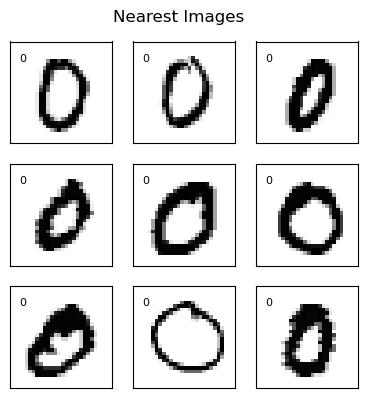

In [82]:
fig_nearest, ax_nearest = plt.subplots(3, 3, figsize=(4.5, 4.5))

for each_ax, each_neighbor in zip(ax_nearest.flat, nearest_indices):
    each_ax.imshow(model_mnist.image_train[each_neighbor].reshape(28, 28), cmap="Greys")
    each_ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    each_ax.text(2, 5, model_mnist.label_train[each_neighbor], 
        fontsize=8, bbox = dict(color="White", alpha=0.75))
    fig_nearest.suptitle("Nearest Images", y = 0.95)

## Evaluation

It is time to evaluate the model.

### Overall Accuracy

<span style="color:blue;font-weight:bold">Code Block #4: Overall accuracy</span>

1. Get predictions on every image in the test dataset. 
2. Calculate and print out the overall accuracy of the model, which is defined as the number of correct predictions divided by the number of all predictions.

In [86]:
## TODO: Get predictions on test dataset and calculate accuracy
prediction_array = model_mnist.get_prediction_array(image_test)
prediction_acc = np.sum(prediction_array == label_test)/prediction_array.size
print(f"accuracy = {prediction_acc}")

progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
progressing... 
accuracy = 0.1


### Confusion Matrix

<span style="color:blue;font-weight:bold">Code Block #5: Confusion matrix</span>

In [ ]:
## TODO: Get the confusion matrix (hint: see KNN_ConfMtx)
confusion_mat = None
print(confusion_mat)

In [ ]:
fig_confusion, ax_confusion = model_mnist.visualize_confusion_matrix(confusion_mat)